#### Importing the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import requests
import json
import seaborn as sns
from sklearn.cluster import KMeans
# We can override the default matplotlib styles with those of Seaborn
sns.set_theme()## Importing the relevant libraries

Matplotlib is building the font cache; this may take a moment.


In [3]:
querystring = {"currency":"USD","starRatings":"3%2C4%2C5","checkIn":"2020-01-08","locale":"en_US","checkOut":"2020-03-15","sortOrder":"PRICE","destinationId":"1634171","type":"CITY","pageNumber":"9","pageSize":"1000","adults1":"1"}

headers = {
    'x-rapidapi-host': "hotels4.p.rapidapi.com",
    'x-rapidapi-key': "4e6779dbe6msh33b98f588862e5dp1c2495jsn6e6e5fe65df3"
    }

response = requests.request("GET", url, headers=headers, params=querystring)


NameError: name 'url' is not defined

In [ ]:
df = pd.read_csv(
    os.path.join(os.path.pardir,'data','raw','hotels_.csv'), low_memory=False, )
df_ = df.copy()

In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 0 to 860
Data columns (total 17 columns):
Unnamed: 0         587 non-null int64
address            587 non-null object
badging            587 non-null object
coordinate         587 non-null object
deals              587 non-null object
guestReviews       318 non-null object
id                 587 non-null int64
landmarks          587 non-null object
messaging          587 non-null object
name               587 non-null object
neighbourhood      587 non-null object
pimmsAttributes    466 non-null object
providerType       587 non-null object
ratePlan           587 non-null object
starRating         587 non-null float64
supplierHotelId    587 non-null int64
thumbnailUrl       585 non-null object
dtypes: float64(1), int64(3), object(13)
memory usage: 82.5+ KB


In [ ]:
df_.describe(include="all")


,Unnamed: 0,address,badging,coordinate,deals,guestReviews,id,landmarks,messaging,name,neighbourhood,pimmsAttributes,providerType,ratePlan,starRating,supplierHotelId,thumbnailUrl
count,877.000000,877,877,877,877,401,8.770000e+02,877,877,877,877,613,877,587,877.000000,8.770000e+02,852
unique,NaN,703,2,825,1,182,NaN,480,1,870,29,14,3,349,NaN,NaN,852
top,NaN,"{'locality': 'Nairobi', 'region': 'Nairobi Cou...",{},"{'lat': -1.307299, 'lon': 36.908417}",{},"{'unformattedRating': 2.0, 'rating': '2.0', 't...",NaN,"[{'label': 'City center', 'distance': '2.8 mil...",{},Game View Hotels,Nairobi,D13|TESCO,LOCAL,"{'price': {'current': '$25', 'exactCurrent': 2...",NaN,NaN,https://exp.cdn-hotels.com/hotels/27000000/266...
freq,NaN,58,876,6,877,42,NaN,16,877,2,408,370,790,16,NaN,NaN,1
mean,48.490308,NaN,NaN,NaN,NaN,NaN,7.959397e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.038198,2.741854e+07,NaN
std,28.547948,NaN,NaN,NaN,NaN,NaN,4.917416e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.866335,1.176701e+07,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,1.062220e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,4.226000e+03,NaN
25%,24.000000,NaN,NaN,NaN,NaN,NaN,6.070276e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,1.893836e+07,NaN
50%,48.000000,NaN,NaN,NaN,NaN,NaN,9.257363e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.889801e+07,NaN
75%,73.000000,NaN,NaN,NaN,NaN,NaN,1.177423e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,3.676321e+07,NaN


###### Drop rows with no rates

In [ ]:
df_ = df_[df_['ratePlan'].notnull()]

In [ ]:
def get_latitude(x):
    x=json.loads(x.replace("\'", "\""))
    return x['location']['lat']
def get_longitude(x):
    x=json.loads(x.replace("\'", "\""))
    return x['location']['lng']

In [ ]:
def get_longitude(x):
    x=json.loads(x.replace("\'", "\""))
    return x['location']['lng']

In [ ]:
df['latitude'] = df['geometry'].apply(get_latitude)

In [ ]:
df['longitude'] = df['geometry'].apply(get_longitude)
df['latitude'] = df['geometry'].apply(get_latitude)

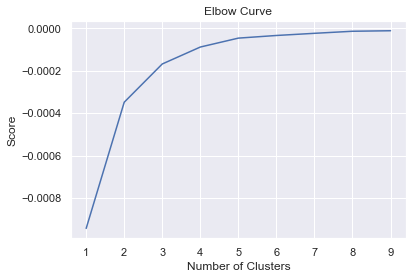

In [ ]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['latitude']]
X_axis = df[['longitude']]


score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(df[["longitude", "latitude"]]) # Compute k-means clustering.
df['cluster_label'] = kmeans.fit_predict(df[["longitude", "latitude"]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(df[["longitude", "latitude"]]) # Labels of each point
df

,geometry,icon,id,name,opening_hours,photos,place_id,plus_code,rating,reference,scope,types,user_ratings_total,vicinity,latitude,longitude,latbin,lonbin,cluster_label
0,"{'location': {'lat': -1.2920659, 'lng': 36.821...",https://maps.gstatic.com/mapfiles/place_api/ic...,6640f6187ee9e3bef7c950b40be5cc5dc088ac41,Nairobi,NaN,"[{'height': 1068, 'html_attributions': ['<a hr...",ChIJp0lN2HIRLxgRTJKXslQCz_c,NaN,NaN,ChIJp0lN2HIRLxgRTJKXslQCz_c,GOOGLE,"['locality', 'political']",NaN,Nairobi,-1.292066,36.821946,-1.4,36.8,2
1,"{'location': {'lat': -1.2851243, 'lng': 36.824...",https://maps.gstatic.com/mapfiles/place_api/ic...,54ec8542d5abfa7848950fd86efcf5d70c84c825,Hilton Nairobi,NaN,"[{'height': 1201, 'html_attributions': ['<a hr...",ChIJrSB4sNcQLxgRBqDHSPkqsO4,"{'compound_code': 'PR7F+XV Nairobi, Kenya', 'g...",4.4,ChIJrSB4sNcQLxgRBqDHSPkqsO4,GOOGLE,"['spa', 'lodging', 'point_of_interest', 'estab...",10318.0,Mama Ngina St Nairobi KE,-1.285124,36.824725,-1.4,36.8,2
2,"{'location': {'lat': -1.2842084, 'lng': 36.822...",https://maps.gstatic.com/mapfiles/place_api/ic...,b9ed75b860fca0c924e76004adaa46db1825b3fc,Sarova Stanley - 5 Star Hotel in Nairobi,{'open_now': True},"[{'height': 3000, 'html_attributions': ['<a hr...",ChIJgal_ZdYQLxgRQJpbfya5kqg,"{'compound_code': 'PR8F+84 Nairobi, Kenya', 'g...",4.5,ChIJgal_ZdYQLxgRQJpbfya5kqg,GOOGLE,"['lodging', 'point_of_interest', 'establishment']",5691.0,Junction Of Kenyatta Avenue and Kimathi Street...,-1.284208,36.822868,-1.4,36.8,2
3,"{'location': {'lat': -1.278375, 'lng': 36.8163...",https://maps.gstatic.com/mapfiles/place_api/ic...,1929856e958e5be0eb59a3709706494ac2d7e829,Hotel Fairmont The Norfolk,{'open_now': True},"[{'height': 2002, 'html_attributions': ['<a hr...",ChIJy4gsBC0XLxgRYYmqBERDcfI,"{'compound_code': 'PRC8+MG Nairobi, Kenya', 'g...",4.6,ChIJy4gsBC0XLxgRYYmqBERDcfI,GOOGLE,"['lodging', 'restaurant', 'food', 'point_of_in...",2095.0,Harry Thuku Rd,-1.278375,36.816335,-1.4,36.8,0
4,"{'location': {'lat': -1.287956, 'lng': 36.8193...",https://maps.gstatic.com/mapfiles/place_api/ic...,44f3a1f8650f1137f0045b1a58d0a1131c93338c,InterContinental Nairobi,{'open_now': True},"[{'height': 3000, 'html_attributions': ['<a hr...",ChIJp9SCBdoQLxgR9A_-3jsqXCo,"{'compound_code': 'PR69+RP Nairobi, Kenya', 'g...",4.5,ChIJp9SCBdoQLxgR9A_-3jsqXCo,GOOGLE,"['lodging', 'point_of_interest', 'establishment']",5208.0,City Hall Way,-1.287956,36.819310,-1.4,36.8,2
5,"{'location': {'lat': -1.2900186, 'lng': 36.810...",https://maps.gstatic.com/mapfiles/place_api/ic...,70202fd0a6169d3ea6350e721e98abe789387f84,Sarova Panafric - Hotel in Nairobi,{'open_now': True},"[{'height': 6878, 'html_attributions': ['<a hr...",ChIJJ-p1ydEQLxgRLAIGz9cxzlg,"{'compound_code': 'PR56+X6 Nairobi, Kenya', 'g...",4.5,ChIJJ-p1ydEQLxgRLAIGz9cxzlg,GOOGLE,"['lodging', 'point_of_interest', 'establishment']",4617.0,"Along Valley Road, Nairobi",-1.290019,36.810569,-1.4,36.8,1
6,"{'location': {'lat': -1.2841672, 'lng': 36.816...",https://maps.gstatic.com/mapfiles/place_api/ic...,63b47bb6da3122d022202ddad914dd10196997a5,Laico Regency Hotel,{'open_now': True},"[{'height': 1091, 'html_attributions': ['<a hr...",ChIJ8bPTgtEQLxgRM12ZdpRcQEg,"{'compound_code': 'PR88+8Q Nairobi, Kenya', 'g...",4.2,ChIJ8bPTgtEQLxgRM12ZdpRcQEg,GOOGLE,"['lodging', 'point_of_interest', 'establishment']",3015.0,"Uhuru Highway, Nairobi",-1.284167,36.816969,-1.4,36.8,0
7,"{'location': {'lat': -1.2920659, 'lng': 36.821...",https://maps.gstatic.com/mapfiles/place_api/ic...,0eff4e5968c63bac87750ec22627eb12a8b6e80b,Nairobi Apartments,{'open_now': True},"[{'height': 758, 'html_attributions': ['<a hre...",ChIJu0kQLNIQLxgRBZCP4pIlZDE,NaN,4.1,ChIJu0kQLNIQLxgRBZCP4pIlZDE,GOOGLE,"['lodging', 'point_of_interest', 'establishment']",93.0,"Mokhtar Nairobi KE, Dahha Street, Nairobi",-1.292066,36.821946,-1.4,36.8,2
8,"{'location': {'lat': -1.2810872, 'lng': 36.818...",https://maps.gstatic.com/mapfiles/place_api/ic...,7f82e181eda63c3331fa241169215b4a616a423a,Kenya Comfort Hotel,{'open_now': T

In [ ]:
centers[:, 0]

array([36.81972348, 36.81159145, 36.82439975])